In [1]:
import pandas as pd # Allows for further data manipulation and analysis
import numpy as np # Provides ways to work with large multidimensional arrays
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

In [2]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    # Save data to a CSV file
    df.to_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    return df

In [3]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    # Try to get the file and if it doesn't exist issue a warning
    try:
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [4]:
# Add daily returns to dataframe
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    return df  

In [5]:
# Returns total returns over time
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    #df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

In [6]:
# You get 4 percent return on amazon stock if you bought it on jan 1, 1 and sold it 2021, 1, 1

In [7]:
# Receives a ticker and the date range for which to plot using matplotlib finance
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

In [8]:
# Simple price plot
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("/Users/Mustapha/Desktop/New_folder_(2)/Python4Finance-main/Python4Finance-main" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

In [9]:
# Download multiple stocks
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [10]:
# Merge multiple stocks in one dataframe by column name
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
    return mult_df

In [11]:
# Get changing value of investment using multiple stocks
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [12]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [13]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

Total Return -0.3023448736293357
Stock: UDMY Mean:   23.94 Standard deviation: 4.56
Coefficient of Variation: 0.19039816624618833

Stock: AVT  Mean:   38.57 Standard deviation: 1.23
Coefficient of Variation: 0.031827233101938496



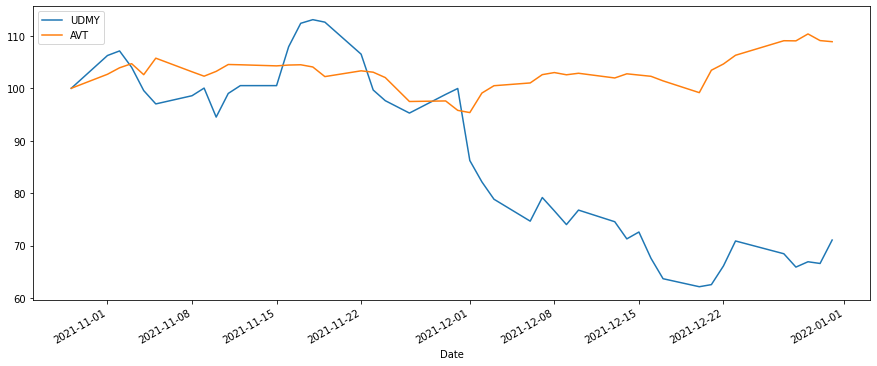

In [16]:
# Testing the function
udmy= save_to_csv_from_yahoo('UDMY', 2021, 1, 1, 2022, 1, 1)

udmy = get_df_from_csv('udmy')

add_daily_return_to_df(udmy, 'UDMY')
# udmy

tot_ret = get_return_defined_time(udmy, 2021, 1, 1, 2022, 1, 1)
print('Total Return', tot_ret)

# mplfinance_plot('AMZN','ohlc',2020, 1, 1, 2021, 1, 1)
# price_plot('AMZN',2020, 1, 1, 2021, 1, 1)

# Download multiple stocks
# tickers = ['UDMY', 'AVT']
# download_multiple_stocks(2021, 1, 1, 2022, 1, 1, *tickers)

# Merge dataframes from multiple stocks using the same column name
tickers = ['UDMY', 'AVT']
mult_df = merge_df_by_column_name('Adj Close', 2021, 1, 1, 2022, 1, 1, *tickers)
mult_df.tail()

# Plots the amount of returns you would have if you had invested 100 USD in each of them
plot_return_mult_stocks(100, mult_df)

get_mult_stock_mean_sd(mult_df)

In [ ]:
# From the above, we find out that if 100USD was invested in both UDMY and AVT,
# you would slightly be above your initial investment for AVT stock
# While UDMY stocks value will below 20% of the initial investment
# Also we see that AVT  stock has the least variability